# Analiza glavnih komponenti

Analiza glavnih komponenti (engl. *principal component analysis*, skraćeno *PCA*) je statistička procedura za redukciju dimenzionalnosti kojom se skup potencijalno korelisanih atributa preslikava u skup nekorelisanih atributa. Svaki od atributa iz novog skupa se naziva glavnom komponentom i svi atributi su *linearno nekorelisani*. Prva glavna komponenta se bira tako da ima najveću moguću varijansu (drugim rečima, bira se tako da duž nje podaci najviše variraju). Svaka naredna glavna komponenta se bira tako da je normalna na sve prethodne i da, takođe, ima trenutnu najveću varijansu. Ukoliko se odabere samo nekoliko sopstvenih vektora, smanjuje se dimenzionalnost početnog prostora. Pritom se, naravno, deo informacija gubi. 

### Standardni koraci PCA analize su:

1) standardizacija skupa podataka: 

    -po svakoj dimenziji se računa aritmetička sredina i standardna devijacija i na osnovu ovako dobijenih vrednosti podaci se standardizuju

2) kreiranje matrice kovarijanse

    -na poziciji (i, j) matrice kovarijanse računa se i smešta kovarijansa cov(Xi, Xj) atributa Xi i Xj 

3) određivanje sopstvenih vrednosti i sopstvenih vektora matrice kovarijanse

4) uređivanje skupa sopstvenih vrednosti po veličini, od najveće ka najmanjoj, i izbor odgovarajućeg broja sopstvenih vektora tj. glavnih komponenti

5) transformacija i generisanje novog skupa podataka 

6) vizuelizacija 

7) po potrebi vraćanje na polazni skup podataka

<img src='assets/PCA.gif'>

Na slici, položaj vektora obeleženog ljubičastim markerima odgovara prvoj glavnoj komponenti.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import decomposition

### Primer redukcije dimenzionalnosti, bibliotečka podrška

Razmotrimo skup podataka za predviđanje tumora dojke na osnovu 30 različitih atributa, među kojima su tekstura, kompaktnost, površina, glatkost, simetrija, itd. Potrebno je predvideti da li se radi o benignom ili malignom tumoru na osnovu dostupnih informacija o 569 pacijenata. Skup podataka se izdvaja pozivom `load_breast_cancer()` iz `sklearn.datasets` paketa. 

In [3]:
data = datasets.load_breast_cancer()

Samih atributa i opisa skupa možemo se podsetiti ispisivanje detaljnog opisa `print(data.DESCR)`.

In [4]:
# print(data.DESCR)

Najpre ćemo, kao ulaz u algoritam, izvršiti standardizaciju podataka korišćenjem `StandardScaler` klase paketa `sklearn.preprocessing`.

In [5]:
X = data.data
y = data.target
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Biblioteka stavlja na raspolaganje klasu `PCA` paketa `sklearn.decomposition` kojom se može izvršiti redukcija dimenzionalnosti korišćenjem glavnih komponenti. Očekivani parametar je broj glavnih komponenti `n_components`. Mi ćemo polazni skup podataka koji se sastoji od 30 atributa transformisati tako da ima dve glavne komponente.

In [6]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

Kako imamo samo dve glavne komponente, transformisani dvodimenzionalni prostor se može jednostavno predstaviti u ravni. Prva kolona matrice `X_pca` se odnosi na prvu glavnu komponentu i njene vrednosti će biti predstavljene na *x*-osi, a druga kolona se odnosu na drugu glavnu komponentu i njene vrednosti će biti predstavljene na _y_-osi. Kako imamo samo dve ciljne klase, vrednosti ciljne promenljive su 0 ili 1. Tačke za koje je $y = 0$ ćemo obojiti plavom, a tačke za koje je $y = 1$ crvenom bojom. Može se primetiti da su podaci u novom prostoru gotovo linearno razdvojivi!

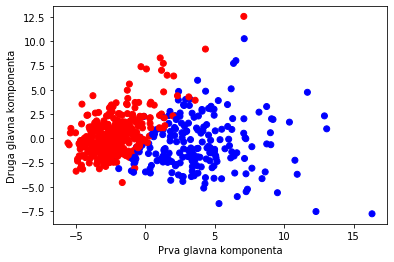

In [7]:
plt.xlabel('Prva glavna komponenta')
plt.ylabel('Druga glavna komponenta')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.where(y==0, 'blue', 'red'))
plt.show()

Matrica `pca.components_` sadrži informacije o međusobnom uticaju svakog od polaznih atributa i dobijenih glavnih komponenti. Tu činjenicu možemo iskoristiti za prikazivanje odgovarajuće toplotne mape. Prvi red se odnosi na prvu, a drugi na drugu glavnu komponentu. Svaki atribut je opisan pojedinačnom kolonom.

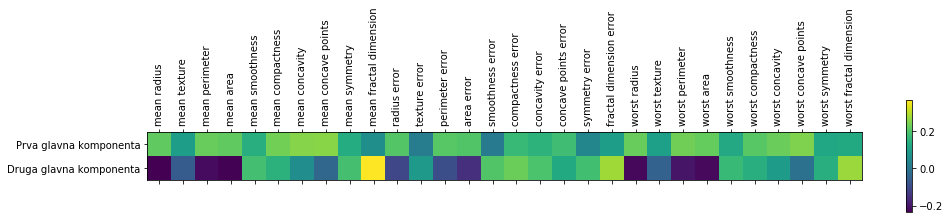

In [8]:
plt.matshow(pca.components_, cmap='viridis')
plt.xticks(np.arange(30), data.feature_names, rotation='vertical')
plt.yticks(np.arange(2), ['Prva glavna komponenta', 'Druga glavna komponenta'])
plt.colorbar()
plt.show()

Atributom `explained_variance_ratio_` možemo odrediti količinu varijanse podataka koje svaka od glavnih komponenti objašnjava.

In [9]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [10]:
np.sum(pca.explained_variance_ratio_)

0.6324320765155944

Zaključujemo da je pomoću dve glavne komponente sačuvano približno 63.24\% ukupne varijanse podataka.

Važno pitanje je kako odrediti polazne atribute ukoliko poznajemo vrednosti atributa u novom prostoru. Funkcija `inverse_transform` omogućava ovu vrstu izračunavanja. Na primer, instanci (5, 2.5) odgovara sledeće vektor polaznog skupa atributa:

In [11]:
pca.inverse_transform([5, 2.5])

array([0.50986939, 0.36935767, 0.59973306, 0.52728315, 1.17823103,
       1.57615579, 1.44241581, 1.21735004, 1.16670672, 1.23825541,
       0.7660135 , 0.31208935, 0.8329865 , 0.63361661, 0.58373339,
       1.433757  , 1.26096716, 1.24289088, 0.67211211, 1.21307168,
       0.59031722, 0.40867838, 0.68350233, 0.57597302, 1.07052369,
       1.40946233, 1.38874795, 1.23378677, 0.96923115, 1.34726839])

Polazna matrica kovarijanse se može, takođe, pročitati na nivou PCA modela.

In [12]:
# pca.get_covariance()

### Algoritam prepoznavanja lica koji koristi PCA

In [13]:
from sklearn import model_selection

Posmatrajmo problem prepoznavanja osoba na zadatim slikama. U rešavanju mu možemo pristupiti kao klasifikacionom zadatku uz adekvatno prikazivanje slika skupom odgovarajućih atributa. Koristićemo k-NN algoritam klasifikacije koji će biti objašćenjen u nastavku, a za predstavljanje slika iskoristićemo redukciju dimenizonalnosti i PCA analizu.

Koristićemo skup podataka koji sadrži slike lica poznatih ličnosti. Podaci se mogu izdvojiti pozivom funkcije `fetch_lfw_people()` iz `sklearn.datasets` paketa. Dva parametra ove funkcije su nam bitna:  `resize` koji određuje skaliranje slika i `min_faces_per_person` koji određuje koliko najmanje slika po osobi treba da ima u skupu. 

In [14]:
data = datasets.fetch_lfw_people(resize=0.8, min_faces_per_person=40)

Više o samom skupu se može pročitati u opisu:

In [15]:
# print(data.DESCR)

In [16]:
print("Broj razlicitih slika:", data.target.shape[0])
print("Broj razlicitih licnosti:", data.target_names.shape[0])

Broj razlicitih slika: 1777
Broj razlicitih licnosti: 17


In [17]:
print("Dimenzije pojedinačnih slika: ", data.images[0].shape)

Dimenzije pojedinačnih slika:  (100, 75)


Vizuelizacije radi, sada ćemo prikazati prvih 20 slika iz skupa. Nacrtaćemo blok dimenzija $4 \times 5$.

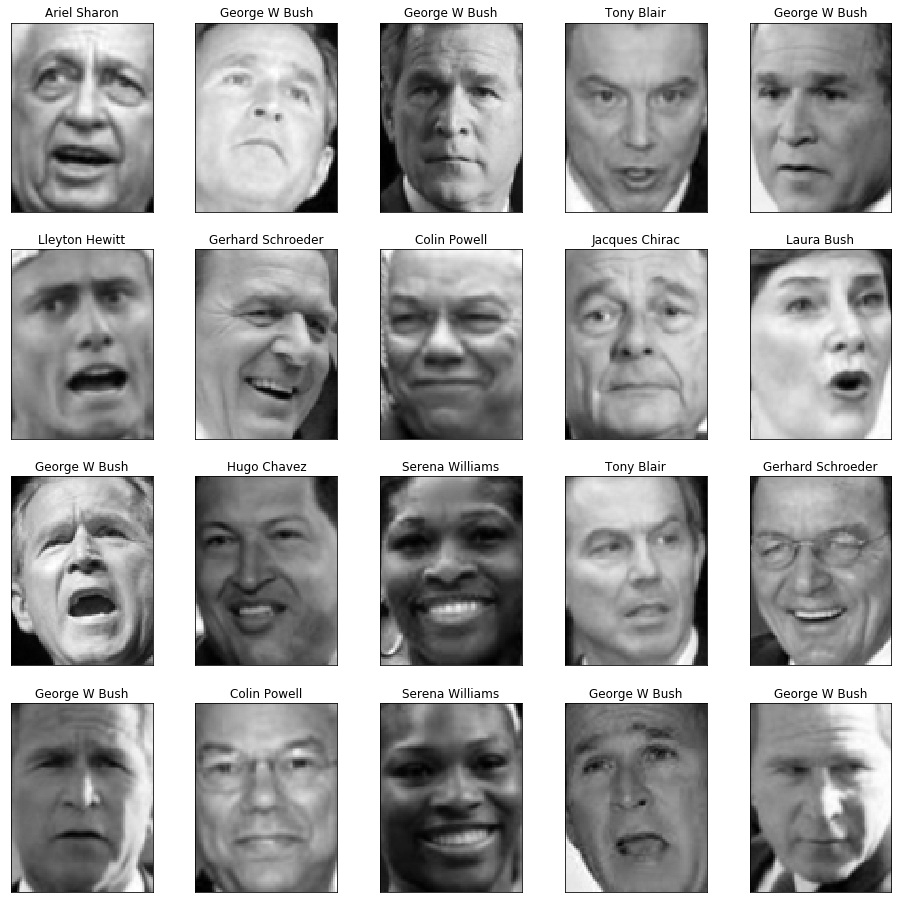

In [18]:
# pravimo blok grafika dimenzija 4x5, 
# svakom od 20 grafika/slika cemo skloniti oznake za x-osu i y-osu
figure, axis = plt.subplots(4, 5, figsize=(16, 16), subplot_kw={'xticks':(), 'yticks':()})

# kroz ovaj skup blokva cemo prolaziti iterativno 
# svescemo ga na jednodimenzioni niz pozivom funkcije ravel() 
ravel = axis.ravel()

# za svaki blok
for i in range(ravel.shape[0]):
    # izdvajamo osu za rad
    axis = ravel[i]
    
    # izdvajamo sliku iz niza slika data.images 
    image = data.images[i]
    
    # iz data.target niza izdvajamo indeks licnosti koja je prikazana na slici
    # i iz data.target_names niza ime te licnosti
    name = data.target_names[data.target[i]]
    
    # prikazujemo crno-bele slike i imena licnosti
    axis.imshow(image, cmap='gray')
    axis.set_title(name)

Podatke ćemo podeliti na skup za treniranje i skup za testiranje, gde će oko trećina podataka biti iskorišćena za testiranje. Lica ćemo probati da prepoznamo/klasifikujemo pomoću algoritma $k$ najbližih suseda, pri čemu ćemo za parametar $k$ (broj suseda) odabrati vrednost 3. Prvo ćemo probati sa korišćenjem svih piksela slika, a zatim ćemo skup podataka preslikati u prostor manje dimenzije koji je određen sa 100 glavnih komponenti i uporediti rezultate. 

In [19]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=7)

Algoritam $k$ najbližih suseda ćemo se najlakše podsetiti preko primera sa donje slike. Zadatak je klasifikovati zeleni krug u jednu od dve klase; treba odrediti da li krug pripada plavim kvadratima ili crvenim trouglovima. Ako je $k = 3$ (manji krug nacrtan punom linijom), zeleni krug će pripadati drugoj klasi, zato što se unutar nacrtanog kruga nalaze dva trougla i samo jedan kvadrat. Ako je $k = 5$ (veći krug nacrtan isprekidanom linijom), zeleni krug će pripadati prvoj klasi, budući da se unutar isprekidanog kruga nalazi više kvadrata nego trouglova.

<img src="assets/knn.png">

Nakon izvršene podele na skup za treniranje i skup za testiranje, primenjujemo algoritam $k$ najbližig suseda i izračunavamo tačnost. Podrška za rad sa algoritmom najbližih suseda je stavljena na raspolaganje preko `KNeighborsClassifier` klase paketa `sklearn.neighbors`. Broj suseda `n_neighbors` ćemo podesiti na 5, a kao funkciju za računanje rastojanje između instanci odabraćemo euklidsku.

In [20]:
from sklearn import neighbors

In [21]:
classifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [22]:
print('Tacnost modela je: ', score)

Tacnost modela je:  0.514480408858603


Sada ćemo primeniti isti algoritam, ali ćemo smanjiti dimenzionalnost prostora koristeći PCA, podesivši broj glavnih komponenata na 100.

In [23]:
pca = decomposition.PCA(n_components=100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
pca_classifier = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
pca_classifier.fit(X_train_pca, y_train)
pca_score = pca_classifier.score(X_test_pca, y_test)

In [25]:
print('Tacnost PCA modela je: ', pca_score)

Tacnost PCA modela je:  0.5264054514480409


Vidimo da je skor nešto veći u slučaju kada koristimo PCA. Jasno je da postoje i algoritmi koji bi nad istim skupom podataka imali znatno veći skor. Zajedničko im je svima da se mogu koristiti PCA za predstavljanje svojih podataka. U nastavku će biti prikazano kako izgleda prvih nekoliko glavnih komponenti. 

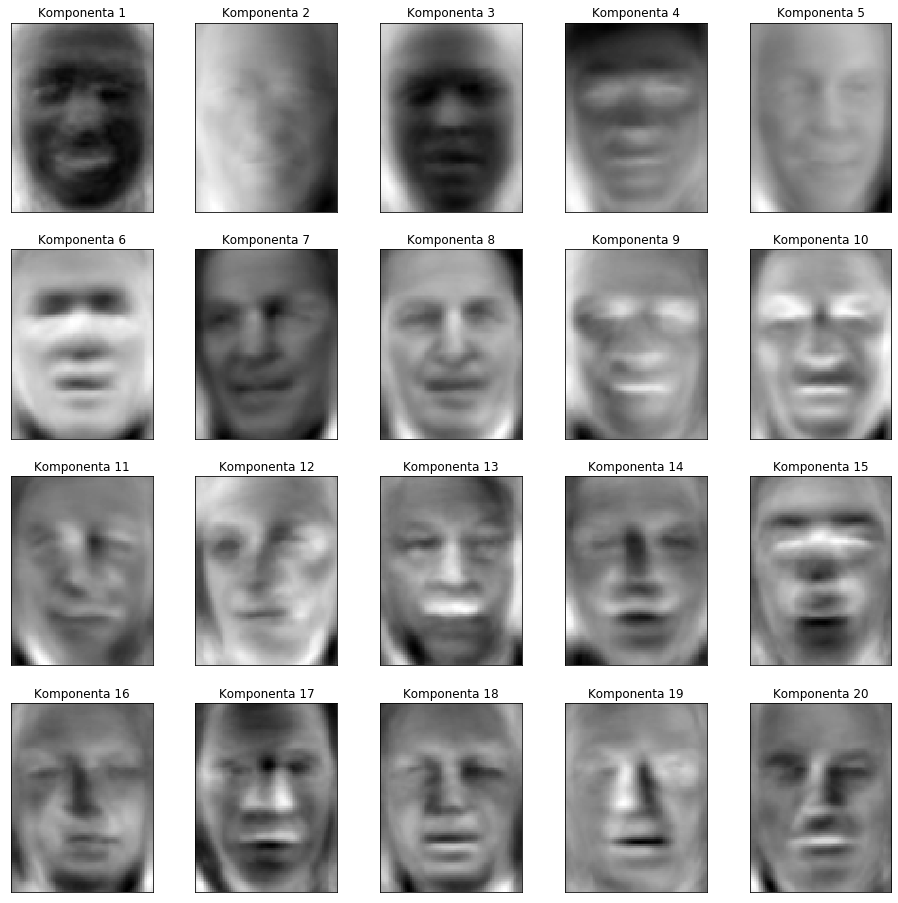

In [26]:
# pravimo blok grafika dimenzija 4x5, 
# svakom od 20 grafika/slika cemo skloniti oznake za x-osu i y-osu
figure, axis = plt.subplots(4, 5, figsize=(16, 16), subplot_kw={'xticks':(), 'yticks':()})

# kroz ovaj skup blokva cemo prolaziti iterativno 
# svescemo ga na jednodimenzioni niz pozivom funkcije ravel() 
ravel = axis.ravel()

# sve slike su istih dimenzija
imgshape = data.images[0].shape

# za svaki blok
for i in range(ravel.shape[0]):
    
    # izdvajamo osu za rad
    axis = ravel[i]
    
    # izdvajamo i-tu komponentu i svodimo je na dimenzije slike
    component = pca.components_[i]
    component = component.reshape(imgshape)
    
    # prikazujemo sliku i naziv komponente
    axis.imshow(component, cmap='gray')
    axis.set_title("Komponenta {0}".format(i+1))

Vidimo da se različite komponente fokusiraju na različite karakteristike lica kao što su oblik lica, položaj glave, predeo očiju i nosa, i slično. Ovo svakako može biti informativno u interpretaciji i analizi rada modela.